# Lab - Transformada Z

*Processamento Digital de Sinais - UFPR - Prof. Eduardo Parente Ribeiro*

Esta atividade explora os conceitos da transformada Z para analizar o comportamento em frequência de sistemas discretos lineares e invariantes ao deslocamento.

In [7]:
from pylab import *
from scipy import signal

1) crie uma função H=respfreq(b,a,N) que retorne H, o vetor complexo que contem a resposta em frequência do sistema para N valores de frequencia entre 0 e $\pi$. 

In [8]:
def respfreq(b, a, V):

    H = empty(V, dtype=complex)
    w = linspace(0, np.pi, V, endpoint=False)

    for i in range(V):
        z = np.exp(1j * w[i])
        num = np.sum(np.multiply(b, np.power(z, -np.arange(len(b)))))
        den = np.sum(np.multiply(a, np.power(z, -np.arange(len(a)))))
        H[i] = num / den

    return w, H

2) Considere o sistema $y[n]=T\{x[n]\}$, linear,invariante ao deslocamento, determinado pela EDCC:
$ y[n]= 1,5y[n-1]-0,7y[n-2]+0.3x[n]+0.2x[n-1]+0.1x[n-2]$

Plote no mesmo eixo a resposta em frequencia deste sistema usando respfreq() com 100 valores (linha) e freqz() com 40 valores (simbolo 'o').


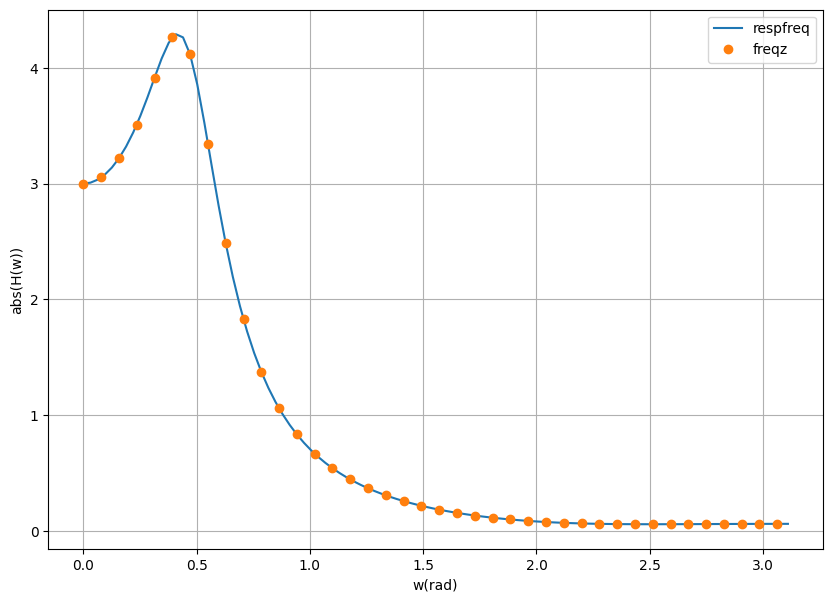

In [9]:
b = [0.3, 0.2, 0.1]
a = [1, -1.5, 0.7]

V_respfreq = 100
V_freqz = 40

w_respfreq, H_respfreq = respfreq(b, a, V_respfreq)

w_freqz, H_freqz = signal.freqz(b, a, worN=V_freqz)

figure(figsize=(10, 7))
plot(w_respfreq, abs(H_respfreq), label='respfreq')
plot(w_freqz, abs(H_freqz), 'o', label='freqz')
xlabel('w(rad)')
ylabel('abs(H(w))')
grid()
legend()
show()

3) Informe os pólos e zeros deste sistema

In [10]:
numerator = [0.3, 0.2, 0.1]
zeros = roots(numerator)

print("Zeros do sistema:", zeros)

denominator = [1, -1.5, 0.7]
poles = roots(denominator)

print("Polos do sistema:", poles)


Zeros do sistema: [-0.33333333+0.47140452j -0.33333333-0.47140452j]
Polos do sistema: [0.75+0.37080992j 0.75-0.37080992j]


4) plote o diagrama de pólos e zeros

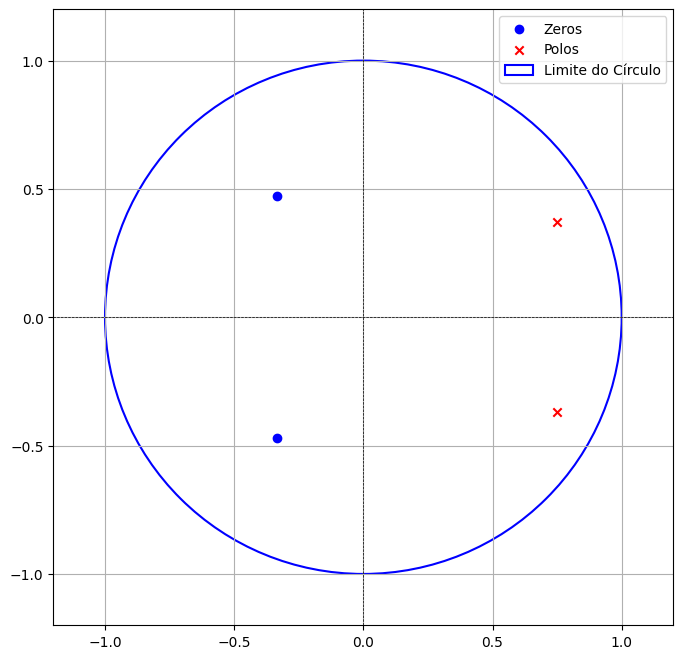

In [12]:
figure(figsize=(8, 8))

circle = Circle((0, 0), 1, color='b', fill=False, linewidth=1.5, label='Limite do Círculo')

scatter(real(zeros), imag(zeros), marker='o', color='b', label='Zeros')
scatter(real(poles), imag(poles), marker='x', color='r', label='Polos')

ax = plt.gca()
ax.add_artist(circle)

xlim(-1.2, 1.2)
ylim(-1.2, 1.2)

axhline(y=0, color='k', linestyle='--', linewidth=0.5)
axvline(x=0, color='k', linestyle='--', linewidth=0.5)
legend()
grid()
show()